In [12]:
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [15]:
f = open('PLOT.csv', 'r', encoding="utf-8-sig")
Hierarchical_dict = {'TF':[], 'HepG2':[],'K562':[],'GM12878':[],'MCF-7':[],'A549':[]}
heatmap_num_dict = {'TF':[], 'HepG2':[],'K562':[],'GM12878':[],'MCF-7':[],'A549':[]}
scatter_peak_dict = {'TF':[]}
scatter_AVG_dict = {'TF':[]}

for i in f:
    if i.startswith("TF"):
        continue
        
    i = i.strip('\n')
    
    col = i.split(',')
    tf, Cell_line, AVG, Peak_num = col[0], col[1], float(col[2]), int(col[3])
    
    if tf not in Hierarchical_dict['TF']:
        Hierarchical_dict['TF'].append(tf)
        heatmap_num_dict['TF'].append(tf)
    if tf not in scatter_peak_dict['TF']:
        scatter_AVG_dict['TF'].append(tf)
        scatter_peak_dict['TF'].append(tf)
    
        scatter_peak_dict[tf] = []
        scatter_AVG_dict[tf] = []
    
    Hierarchical_dict[Cell_line].append(AVG)
    heatmap_num_dict[Cell_line].append(Peak_num)
    scatter_peak_dict[tf].append(Peak_num)
    scatter_AVG_dict[tf].append(AVG)



"\nprint(len(Hierarchical_dict['TF']))\nprint(len(Hierarchical_dict['HepG2']))\nprint(len(Hierarchical_dict['K562']))\nprint(len(Hierarchical_dict['GM12878']))\nprint(len(Hierarchical_dict['MCF-7']))\nprint(len(Hierarchical_dict['A549']))"

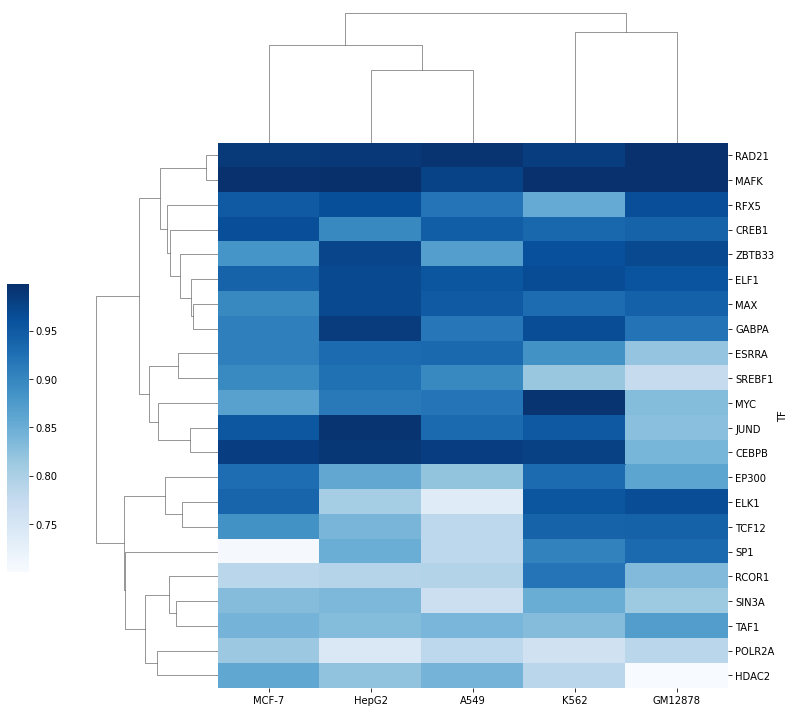

In [18]:
Hierarchical_data = pd.DataFrame(Hierarchical_dict)
Hierarchical_data.set_index('TF', inplace=True)

sns.clustermap(Hierarchical_data, figsize=(10, 10), cbar_pos=(-.1, .2, .03, .4), cmap = 'Blues');

Text(66.5, 0.5, 'TF')

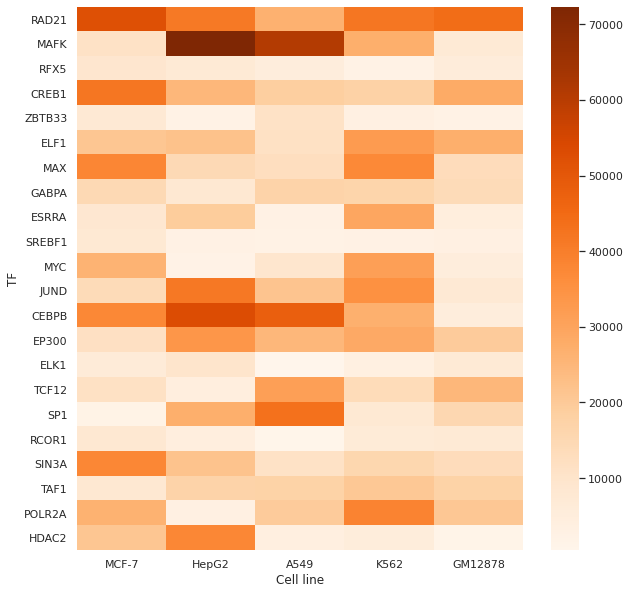

In [27]:
x_label = ['MCF-7', 'HepG2', 'A549', 'K562', 'GM12878']
y_label = ['RAD21', 'MAFK', 'RFX5', 'CREB1', 'ZBTB33', 'ELF1', 'MAX', 'GABPA', 'ESRRA', 'SREBF1', 'MYC', 'JUND', 'CEBPB', 'EP300', 'ELK1', 'TCF12', 'SP1', 'RCOR1', 'SIN3A', 'TAF1', 'POLR2A', 'HDAC2']

heatmap = np.zeros((len(y_label), len(x_label)))

for i in range(len(y_label)):
    for j in range(len(x_label)):
        index_in_TF = heatmap_num_dict['TF'].index(y_label[i])
        heatmap[i][j] = heatmap_num_dict[x_label[j]][index_in_TF]
        
sns.set(rc={'figure.figsize':(10, 10)})

s = sns.heatmap(heatmap, xticklabels=x_label, yticklabels=y_label, cmap = 'Oranges')
s.set_xlabel('Cell line', fontsize=12)
s.set_ylabel('TF', fontsize=12)
